# Подготовка данных на примере задачи распознавания цифр

Загрузка датасета

In [13]:

# from torchvision.datasets import MNIST

# train_data = MNIST(root='./data', train=True, download=True, transform=None)
# test_data  = MNIST(root='./data', train=False, download=True, transform=None)

# from torchvision.datasets import MNIST

# train_data = MNIST(root='./data', train=True, download=False, transform=None)
# test_data  = MNIST(root='./data', train=False, download=False, transform=None)

# from torchvision.datasets import MNIST
# train_data = MNIST(root='./data', train=True, download=True, transform=None)
# test_data  = MNIST(root='./data', train=False, download=True, transform=None)

from torchvision.datasets import FashionMNIST

train_data = FashionMNIST(root='./data', train=True, download=True, transform=None)
test_data  = FashionMNIST(root='./data', train=False, download=True, transform=None)

train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: ./data
     Split: Train,
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: ./data
     Split: Test)

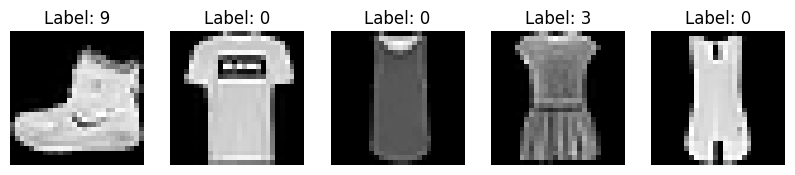

In [9]:
# Блок кода отвечающий за визуализацию, его редактировать не надо.
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(10,2))
for i, ax in enumerate(axes):
    img, label = train_data[i]
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')
plt.show()

## Задание 1. Загрузка с одновременной трансформацией

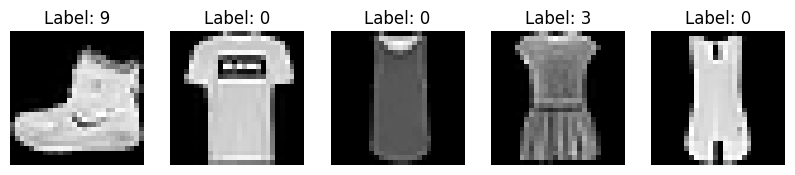

In [ ]:

import matplotlib.pyplot as plt
import torchvision.transforms as transforms
# from torchvision.datasets import MNIST
from torchvision.datasets import FashionMNIST

transform = transforms.Compose([
    transforms.ToTensor(),                     # из [0,255] в [0,1]
    transforms.Normalize((0.1307,), (0.3081,)) # нормализация (mean=0.1307,std=0.3081)
    # Значения вычислены по всему тренировочному набору MNIST и помогают привести данные к нулевому среднему и единичному стандартному отклонению, что ускоряет и стабилизирует обучение.
])

# Загружаем тренировочные и тестовые данные
train_data = FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_data = FashionMNIST(root='./data', train=False, download=True, transform=transform)


# Блок кода отвечающий за визуализацию, его редактировать не надо.
fig, axes = plt.subplots(1, 5, figsize=(10,2))
for i, ax in enumerate(axes):
    img, label = train_data[i]
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')
plt.show()

## Задание 2

1. Разбейте данные на тренировочную и валидационную выборки.
1. Создайте загрузчики данных (DataLoader) для пакетной подачи в модель с размером батча 64. 
+ Для тренировки перемешайте данные с помощью параметра shuffle=True.
+ Для валидации оставьте данные как есть.
  DataLoader оборачивает Dataset и позволит итерироваться по мини‑батчам с помощью next(iter(train_loader)).
3. Возьмите первый батч из train-выборки и выведите тензоры изображений и соответствующих меток.

images.shape: torch.Size([64, 1, 28, 28])
labels.shape: torch.Size([64])
Метка первого изображения в батче: 7


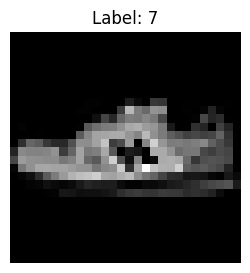

In [11]:

from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
# from torchvision.datasets import MNIST
from torchvision.datasets import FashionMNIST

# Определяем преобразования
transform = transforms.Compose([
    transforms.ToTensor(),                     # из [0,255] в [0,1]
    transforms.Normalize((0.1307,), (0.3081,)) # нормализация (mean=0.1307,std=0.3081)
])

# Загружаем данные MNIST
train_data = FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_data  = FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Разделяем данные на тренировочную и валидационную выборки
train_size = int(0.8 * len(train_data))
val_size   = len(train_data) - train_size

train_data, val_data = random_split(train_data, [train_size, val_size])

# Создаем загрузчики данных
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_data, batch_size=64, shuffle=False)


# Получаем первый батч из train-выборки
images, labels = next(iter(train_loader))


# Печатаем формы тензоров
print("images.shape:", images.shape)   # torch.Size([64, 1, 28, 28])
print("labels.shape:", labels.shape)   # torch.Size([64])


# Выведем метку первого изображения
first_label = labels[0].item()
print("Метка первого изображения в батче:", first_label)


# Отобразим само первое изображение
plt.figure(figsize=(3,3))
plt.imshow(images[0].squeeze(), cmap='gray')
plt.title(f"Label: {first_label}")
plt.axis('off')
plt.show()

# Задание

**Формат задания**

Выполните задание локально на своём устройстве: скопируйте код ниже, реализуйте шаги и проанализируйте результаты. 

Проверить задание вы сможете самостоятельно. В конце выполнения нажмите кнопку «Готово» и увидите авторское решение — с ним вы можете сверить свой вариант. 

**Что нужно сделать**

Реализуйте и протестируйте свой собственный цикл обучения. Выполните такие шаги:

1. Импортируйте библиотеки: torch, torchvision, matplotlib, clearml — и нужные модули.
1. Реализуйте модель AdvancedMNISTMLPList, определённую в предыдущем уроке.
1. Подготовьте данные: используйте torchvision.datasets.MNIST с DataLoader для обучающего и тестового наборов.
1. Определите функцию потерь и оптимизатор: criterion = nn.CrossEntropyLoss(), optimizer = optim.Adam(...). Задайте подходящую скорость обучения (например, lr=0.001).
1. Настройте подключение ClearML: вызовите Task.set_credentials(...) со своими данными, затем Task.init(project_name, task_name).
1. Реализуйте цикл обучения в 5 эпох:
+ Для каждой эпохи сбрасывайте метрику и собирайте новые значения loss и точности.
+ Внутри цикла для каждого батча проводите прямой и обратный проход, обновление оптимизатором.
+ После каждой эпохи вычисляйте среднюю потерю и точность на обучающем наборе.
+ Выводите результат в консоль и отправляйте в ClearML (с помощью Logger.current_logger().report_scalar).
7. Оцените модель на тестовом наборе после завершения обучения: вычислите test_loss и test_accuracy.
8. Постройте графики потерь и точности по эпохам с помощью matplotlib. Сохраните или отобразите их. Убедитесь, что после обучения сохраняете значения epoch_loss и epoch_acc в списки для отрисовки графиков.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from clearml import Task, Logger

In [2]:
# Определяем модель AdvancedMNISTMLPList (с прошлого урока)
class AdvancedMNISTMLPList(nn.Module):
    def __init__(self):
        super(AdvancedMNISTMLPList, self).__init__()
        self.layers = nn.ModuleList([
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        ])
        
    def forward(self, x):
        x = x.view(-1, 28*28)  # раскладываем картинку в вектор
        for layer in self.layers:
            x = layer(x)
        return x

In [3]:
# Инициализируем модель
model = AdvancedMNISTMLPList()
model

AdvancedMNISTMLPList(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [4]:
# Загружаем данные MNIST (тренировочный и тестовый набор)
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

RuntimeError: Error downloading train-images-idx3-ubyte.gz:
Tried https://ossci-datasets.s3.amazonaws.com/mnist/, got:
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1010)>
Tried http://yann.lecun.com/exdb/mnist/, got:
HTTP Error 404: Not Found
